In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns
import os
import numpy as np
from scipy import stats



In [2]:
# Data Merging


# Directory containing CSV files
input_directory = ("../Project_1/Resources_Input")
# Output file path
output_file = ("../Project_1/Resources_Output/Crypto_merged.csv")

# Get a list of all CSV files in the directory
csv_files = [f for f in os.listdir(input_directory) if f.endswith('.csv')]

# List to hold DataFrames
dataframes = []

# Read each CSV file into a DataFrame
for file in csv_files:
    file_path = os.path.join(input_directory, file)
    df = pd.read_csv(file_path)
    dataframes.append(df)

# Concatenate all DataFrames
merged_df = pd.concat(dataframes, ignore_index=True)

# Write the combined DataFrame to a new CSV file
merged_df.to_csv(output_file, index=False)


In [3]:
# Show First 5 lines for merged_df
merged_df.head()


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,NEM,XEM,2015-04-02 23:59:59,0.000323,0.000227,0.000242,0.000314,28549.400391,2.823534e+06
1,2,NEM,XEM,2015-04-03 23:59:59,0.000330,0.000291,0.000309,0.000310,20677.900391,2.792457e+06
2,3,NEM,XEM,2015-04-04 23:59:59,0.000318,0.000251,0.000310,0.000277,23550.199219,2.488770e+06
3,4,NEM,XEM,2015-04-05 23:59:59,0.000283,0.000218,0.000272,0.000232,26800.199219,2.087388e+06
4,5,NEM,XEM,2015-04-06 23:59:59,0.000299,0.000229,0.000232,0.000289,22511.500000,2.598354e+06


In [4]:
# Create a clean_data_df to format the date to  datetime64[ns]
clean_data_df = pd.read_csv('../Project_1/Resources_Output/Crypto_merged.csv', parse_dates=['Date'])

In [5]:
# Show data types for clean_data
clean_data_df.dtypes

SNo                   int64
Name                 object
Symbol               object
Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Marketcap           float64
dtype: object

In [6]:
# Create a list and store the Crypto Currency in Target_Symbols
target_symbols = [ 'BTC','ETH', 'ADA','BNB','SOL','DOGE']

# Create a data frame to filter the Crypto Currency selected

filtered_df=clean_data_df[clean_data_df['Symbol'].isin(target_symbols)]
# Show Filtered Dataframe
filtered_df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
7970,1,Binance Coin,BNB,2017-07-26 23:59:59,0.109013,0.099266,0.105893,0.105138,2.003950e+05,1.051380e+07
7971,2,Binance Coin,BNB,2017-07-27 23:59:59,0.108479,0.100888,0.105108,0.107737,3.444990e+05,1.077370e+07
7972,3,Binance Coin,BNB,2017-07-28 23:59:59,0.109019,0.101473,0.107632,0.104067,3.425680e+05,1.040670e+07
7973,4,Binance Coin,BNB,2017-07-29 23:59:59,0.111264,0.101108,0.104782,0.107811,3.402180e+05,1.078110e+07
7974,5,Binance Coin,BNB,2017-07-30 23:59:59,0.108138,0.103162,0.107935,0.106414,2.242610e+05,1.064140e+07
...,...,...,...,...,...,...,...,...,...,...
36189,2756,Dogecoin,DOGE,2021-07-02 23:59:59,0.247997,0.238848,0.243982,0.245264,1.321471e+09,3.194925e+10
36190,2757,Dogecoin,DOGE,2021-07-03 23:59:59,0.250214,0.242454,0.245106,0.246411,9.170158e+08,3.210491e+10
36191,2758,Dogecoin,DOGE,2021-07-04 23:59:59,0.252567,0.243425,0.246425,0.246483,9.735115e+08,3.211767e+10
36192,2759,Dogecoin,DOGE,2021-07-05 23:59:59,0.246419,0.227838,0.246419,0.231614,1.267949e+09,3.018344e+10


In [7]:
# Show data types for filtered_df
filtered_df.dtypes

SNo                   int64
Name                 object
Symbol               object
Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Marketcap           float64
dtype: object

In [8]:
# Filter Doge coin data set

DOGE_df=filtered_df[filtered_df['Symbol'] == 'DOGE'].reset_index()
# Show dataframe DOGE
DOGE_df

,index,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,33434,1,Dogecoin,DOGE,2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,0.000000e+00,1.509085e+06
1,33435,2,Dogecoin,DOGE,2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,0.000000e+00,2.169688e+06
2,33436,3,Dogecoin,DOGE,2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,0.000000e+00,3.188943e+06
3,33437,4,Dogecoin,DOGE,2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,0.000000e+00,1.115034e+07
4,33438,5,Dogecoin,DOGE,2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,0.000000e+00,7.284337e+06
...,...,...,...,...,...,...,...,...,...,...,...
2755,36189,2756,Dogecoin,DOGE,2021-07-02 23:59:59,0.247997,0.238848,0.243982,0.245264,1.321471e+09,3.194925e+10
2756,36190,2757,Dogecoin,DOGE,2021-07-03 23:59:59,0.250214,0.242454,0.245106,0.246411,9.170158e+08,3.210491e+10
2757,36191,2758,Dogecoin,DOGE,2021-07-04 23:59:59,0.252567,0.243425,0.246425,0.246483,9.735115e+08,3.211767e+10
2758,36192,2759,Dogecoin,DOGE,2021-07-05 23:59:59,0.246419,0.227838,0.246419,0.231614,1.267949e+09,3.018344e+10


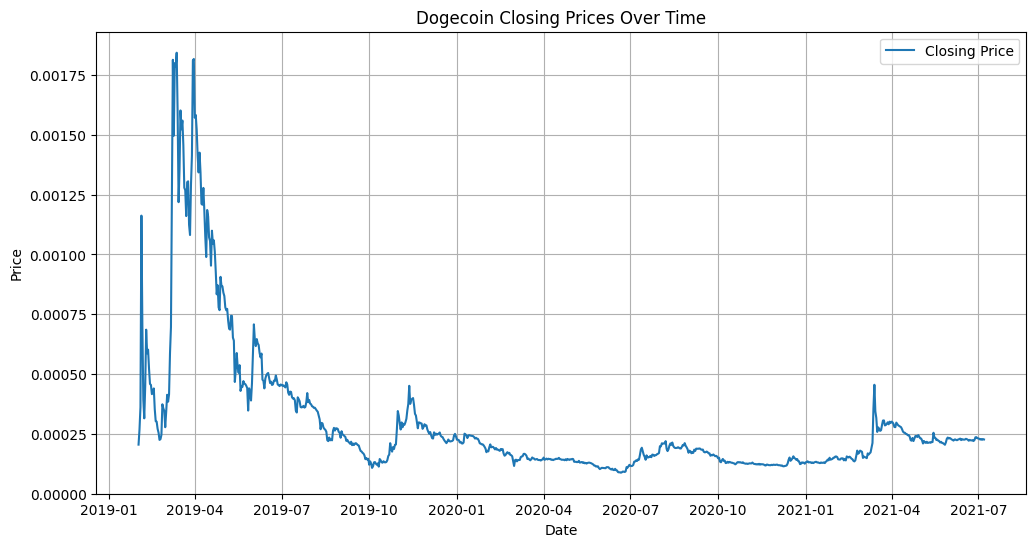

In [9]:
# Convert date column to datetime
DOGE_df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as the index
DOGE_df.set_index('Date', inplace=True)

# Plot closing prices
plt.figure(figsize=(12, 6))
plt.plot(DOGE_df['Close'], label='Closing Price')
plt.title('Dogecoin Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
# Filter Etherum data set

ETH_df=filtered_df[filtered_df['Symbol'] == 'ETH'].reset_index()
# Show dataframe ETH
ETH_df

,index,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,26420,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,6.741880e+05,4.548689e+07
1,26421,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,5.321700e+05,4.239957e+07
2,26422,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,4.052830e+05,4.281836e+07
3,26423,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1.463100e+06,6.456929e+07
4,26424,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2.150620e+06,7.364501e+07
...,...,...,...,...,...,...,...,...,...,...,...
2155,28575,2156,Ethereum,ETH,2021-07-02 23:59:59,2155.596496,2021.824808,2109.892677,2150.040364,3.179621e+10,2.505527e+11
2156,28576,2157,Ethereum,ETH,2021-07-03 23:59:59,2237.567155,2117.590013,2150.835025,2226.114282,1.743336e+10,2.594475e+11
2157,28577,2158,Ethereum,ETH,2021-07-04 23:59:59,2384.286857,2190.837703,2226.550382,2321.724112,1.878711e+10,2.706217e+11
2158,28578,2159,Ethereum,ETH,2021-07-05 23:59:59,2321.922836,2163.041394,2321.922836,2198.582464,2.010379e+10,2.562978e+11


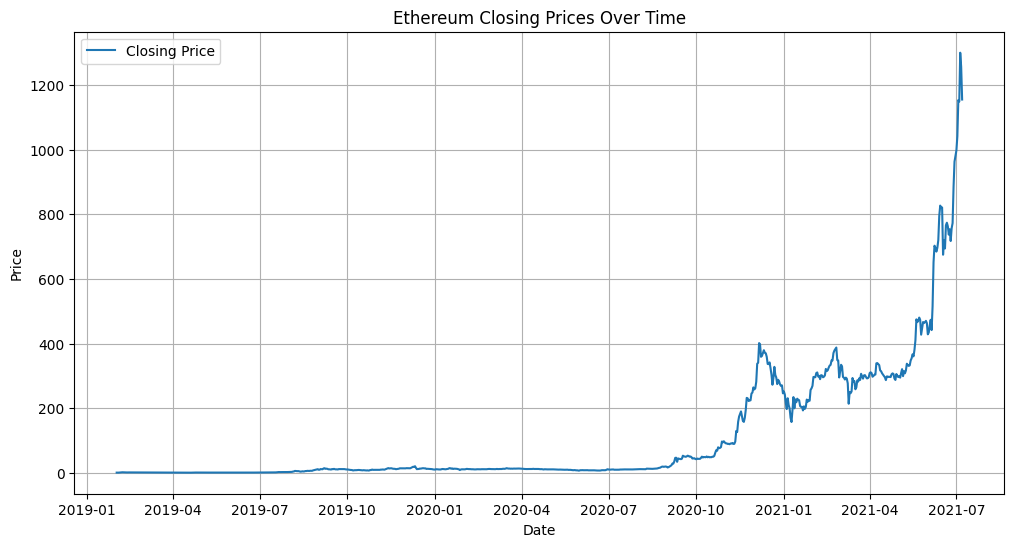

In [11]:
# Convert date column to datetime
ETH_df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as the index
ETH_df.set_index('Date', inplace=True)

# Plot closing prices
plt.figure(figsize=(12, 6))
plt.plot(ETH_df['Close'], label='Closing Price')
plt.title('Ethereum Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Filter Solana data set
SOL_df=filtered_df[filtered_df['Symbol'] == 'SOL'].reset_index()
# Show data frame Solana
SOL_df

,index,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,11171,1,Solana,SOL,2020-04-11 23:59:59,1.049073,0.765020,0.951054,0.776819,4.386244e+07,0.000000e+00
1,11172,2,Solana,SOL,2020-04-12 23:59:59,0.956670,0.762426,0.785448,0.882507,3.873690e+07,0.000000e+00
2,11173,3,Solana,SOL,2020-04-13 23:59:59,0.891603,0.773976,0.890760,0.777832,1.821129e+07,0.000000e+00
3,11174,4,Solana,SOL,2020-04-14 23:59:59,0.796472,0.628169,0.777832,0.661925,1.674761e+07,0.000000e+00
4,11175,5,Solana,SOL,2020-04-15 23:59:59,0.704964,0.621531,0.669289,0.646651,1.307528e+07,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...
447,11618,448,Solana,SOL,2021-07-02 23:59:59,34.031786,31.479924,33.306310,34.020482,4.402988e+08,9.275257e+09
448,11619,449,Solana,SOL,2021-07-03 23:59:59,35.404770,33.298475,34.015575,34.478816,3.270200e+08,9.400216e+09
449,11620,450,Solana,SOL,2021-07-04 23:59:59,35.502372,33.555737,34.495117,34.310601,3.034205e+08,9.354354e+09
450,11621,451,Solana,SOL,2021-07-05 23:59:59,34.461824,32.482692,34.282550,32.984588,3.138393e+08,8.992833e+09


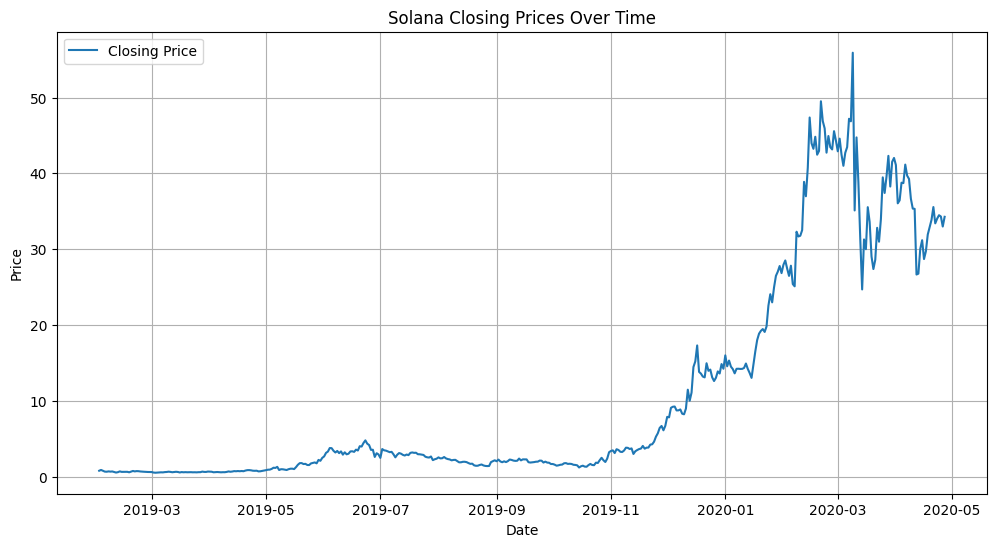

In [13]:
# Convert date column to datetime
SOL_df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as the index
SOL_df.set_index('Date', inplace=True)

# Plot closing prices
plt.figure(figsize=(12, 6))
plt.plot(SOL_df['Close'], label='Closing Price')
plt.title('Solana Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Filter Binance data set
BNB_df=filtered_df[filtered_df['Symbol'] == 'BNB'].reset_index()
Show BNB data frame
BNB_df

SyntaxError: invalid syntax (2904288375.py, line 3)

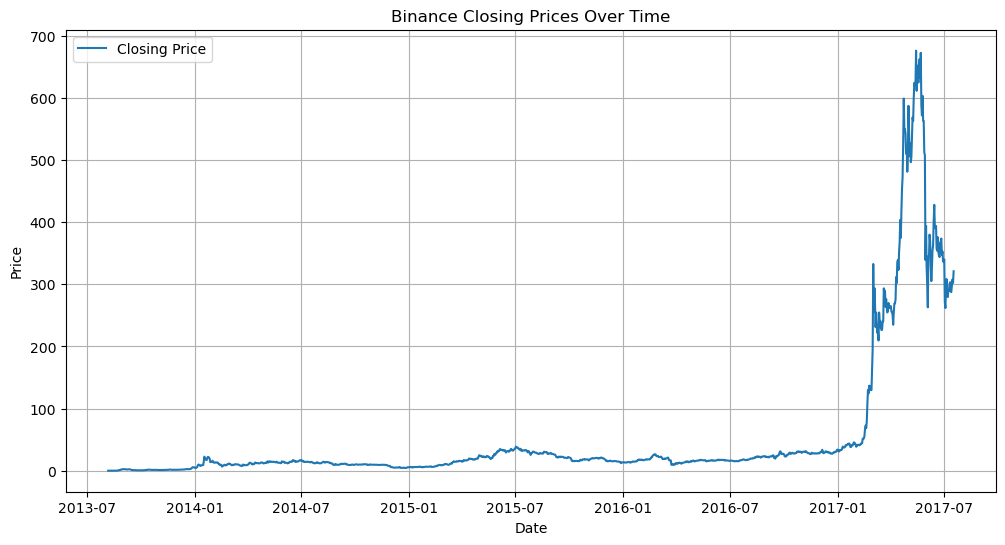

In [ ]:
# Convert date column to datetime
BNB_df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as the index
BNB_df.set_index('Date', inplace=True)

# Plot closing prices
plt.figure(figsize=(12, 6))
plt.plot(BNB_df['Close'], label='Closing Price')
plt.title('Binance Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Filter Binance data set
BTC_df=filtered_df[filtered_df['Symbol'] == 'BTC'].reset_index()
# Show BTC Data frame
BTC_df

,index,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1717,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,1718,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,1719,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,1720,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,1721,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...,...
2986,4703,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,4704,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,4705,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,4706,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


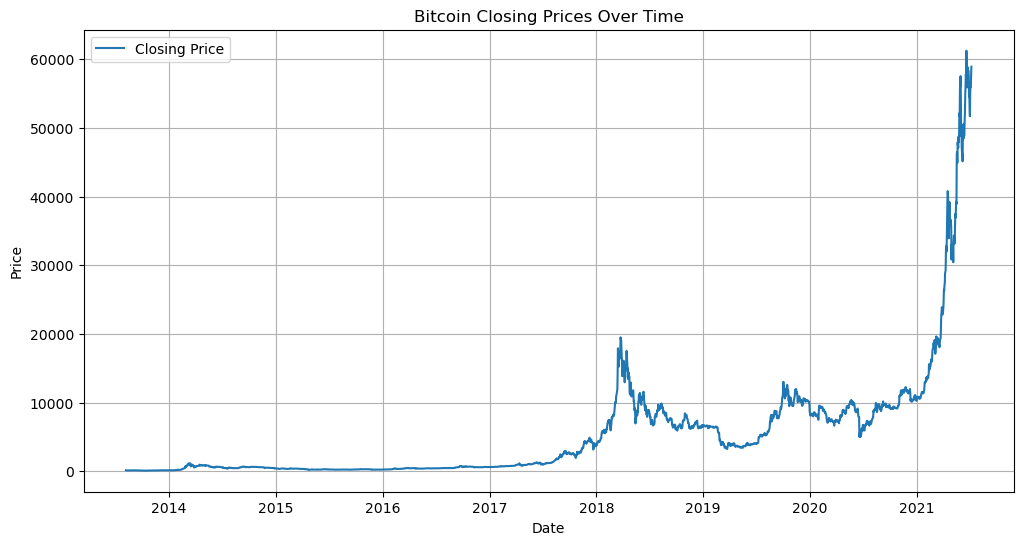

In [ ]:
# Convert date column to datetime
BTC_df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as the index
BTC_df.set_index('Date', inplace=True)

# Plot closing prices
plt.figure(figsize=(12, 6))
plt.plot(BTC_df['Close'], label='Closing Price')
plt.title('Bitcoin Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Filter Cardona data set
ADA_df=filtered_df[filtered_df['Symbol'] == 'ADA'].reset_index()
Show ADA dataframe
ADA_df

,index,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,4708,1,Cardano,ADA,2017-10-02 23:59:59,0.030088,0.019969,0.024607,0.025932,5.764130e+07,6.288991e+08
1,4709,2,Cardano,ADA,2017-10-03 23:59:59,0.027425,0.020690,0.025757,0.020816,1.699780e+07,5.396927e+08
2,4710,3,Cardano,ADA,2017-10-04 23:59:59,0.022806,0.020864,0.020864,0.021931,9.000050e+06,5.686195e+08
3,4711,4,Cardano,ADA,2017-10-05 23:59:59,0.022154,0.020859,0.021951,0.021489,5.562510e+06,5.571390e+08
4,4712,5,Cardano,ADA,2017-10-06 23:59:59,0.021542,0.018360,0.021359,0.018539,7.780710e+06,4.806646e+08
...,...,...,...,...,...,...,...,...,...,...,...
1369,6077,1370,Cardano,ADA,2021-07-02 23:59:59,1.394397,1.286607,1.332942,1.394397,2.159410e+09,4.454587e+10
1370,6078,1371,Cardano,ADA,2021-07-03 23:59:59,1.441714,1.359664,1.394152,1.406836,2.028094e+09,4.494324e+10
1371,6079,1372,Cardano,ADA,2021-07-04 23:59:59,1.493717,1.382153,1.404008,1.458184,1.806362e+09,4.658364e+10
1372,6080,1373,Cardano,ADA,2021-07-05 23:59:59,1.461221,1.379284,1.461221,1.404898,1.759461e+09,4.488134e+10


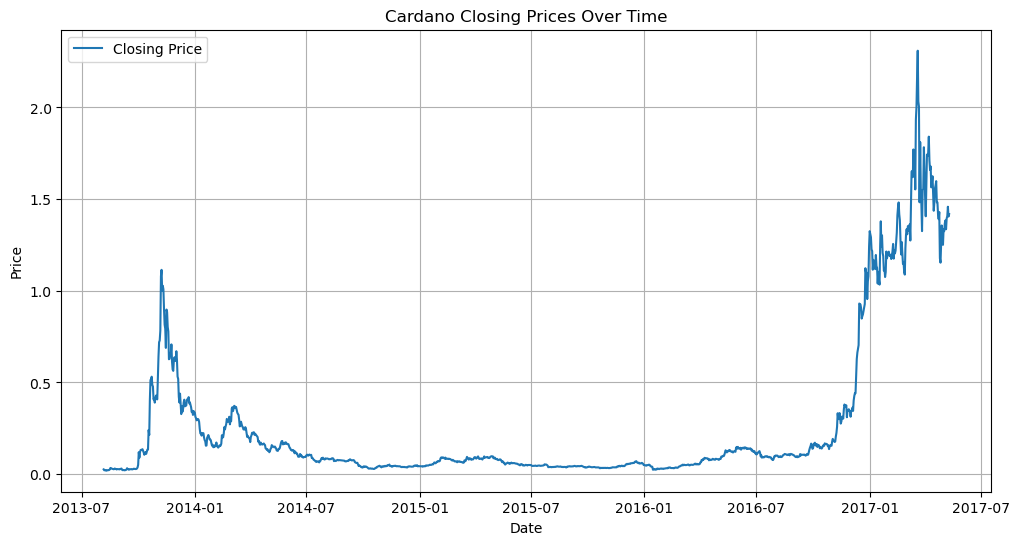

In [ ]:
# Convert date column to datetime
ADA_df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as the index
ADA_df.set_index('Date', inplace=True)

# Plot closing prices
plt.figure(figsize=(12, 6))
plt.plot(ADA_df['Close'], label='Closing Price')
plt.title('Cardano Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Calculate mean median and volatility of DogeCoin
mean_price = DOGE_df['Close'].mean()
print(f"Mean Price: {mean_price}")


median_price = DOGE_df['Close'].median()
print(f"Median Price: {median_price}")

# Ensure the data is sorted by date
DOGE_df = DOGE_df.sort_values(by='Date')

# Calculate daily returns
DOGE_df['return'] = DOGE_df['Close'].pct_change()

# Drop the NaN values that result from the pct_change operation
returns = DOGE_df['return'].dropna()

# Calculate standard deviation of returns
volatility = returns.std()
print(f"Volatility: {volatility}")

Mean Price: 0.013762639322080604
Median Price: 0.00184435040268945
Volatility: 0.11345836448299737


In [ ]:
#Calculate mean median and volatility of Ethereum
mean_price = ETH_df['Close'].mean()
print(f"Mean Price: {mean_price}")


median_price = ETH_df['Close'].median()
print(f"Median Price: {median_price}")

# Ensure the data is sorted by date
ETH_df = ETH_df.sort_values(by='Date')

# Calculate daily returns
ETH_df['return'] = ETH_df['Close'].pct_change()

# Drop the NaN values that result from the pct_change operation
returns = ETH_df['return'].dropna()

# Calculate standard deviation of returns
volatility = returns.std()
print(f"Volatility: {volatility}")

Mean Price: 383.91069131936325
Median Price: 198.64369149700002
Volatility: 0.06303562022503241


In [ ]:
#Calculate mean median and volatility of Solana
mean_price = SOL_df['Close'].mean()
print(f"Mean Price: {mean_price}")


median_price = SOL_df['Close'].median()
print(f"Median Price: {median_price}")

# Ensure the data is sorted by date
SOL_df = SOL_df.sort_values(by='Date')

# Calculate daily returns
SOL_df['return'] = SOL_df['Close'].pct_change()

# Drop the NaN values that result from the pct_change operation
returns = SOL_df['return'].dropna()

# Calculate standard deviation of returns
volatility = returns.std()
print(f"Volatility: {volatility}")

Mean Price: 10.471388329287931
Median Price: 2.8813885885149997
Volatility: 0.09450721975387637


In [ ]:
#Calculate mean median and volatility of Binance
mean_price = BNB_df['Close'].mean()
print(f"Mean Price: {mean_price}")


median_price = BNB_df['Close'].median()
print(f"Median Price: {median_price}")

# Ensure the data is sorted by date
BNB_df = BNB_df.sort_values(by='Date')

# Calculate daily returns
BNB_df['return'] = BNB_df['Close'].pct_change()

# Drop the NaN values that result from the pct_change operation
returns = BNB_df['return'].dropna()

# Calculate standard deviation of returns
volatility = returns.std()
print(f"Volatility: {volatility}")

Mean Price: 52.250307521403116
Median Price: 16.21056933625
Volatility: 0.08004986863144231


In [ ]:
#Calculate mean median and volatility of Bit Coin
mean_price = BTC_df['Close'].mean()
print(f"Mean Price: {mean_price}")


median_price = BTC_df['Close'].median()
print(f"Median Price: {median_price}")

# Ensure the data is sorted by date
BTC_df = BTC_df.sort_values(by='Date')

# Calculate daily returns
BTC_df['Return'] = BTC_df['Close'].pct_change()

# Drop the NaN values that result from the pct_change operation
returns = BTC_df['Return'].dropna()

# Calculate standard deviation of returns
volatility = returns.std()
print(f"Volatility: {volatility}")

Mean Price: 6711.290443071488
Median Price: 2286.409912109375
Volatility: 0.04263924853868491


In [ ]:
#Calculate mean median and volatility of Cardona
mean_price = ADA_df['Close'].mean()
print(f"Mean Price: {mean_price}")


median_price = ADA_df['Close'].median()
print(f"Median Price: {median_price}")

# Ensure the data is sorted by date
ADA_df = ADA_df.sort_values(by='Date')

# Calculate daily returns
ADA_df['return'] = ADA_df['Close'].pct_change()

# Drop the NaN values that result from the pct_change operation
returns = ADA_df['return'].dropna()

# Calculate standard deviation of returns
volatility = returns.std()
print(f"Volatility: {volatility}")

Mean Price: 0.25631264836731377
Median Price: 0.08700221665815
Volatility: 0.0835979909649701


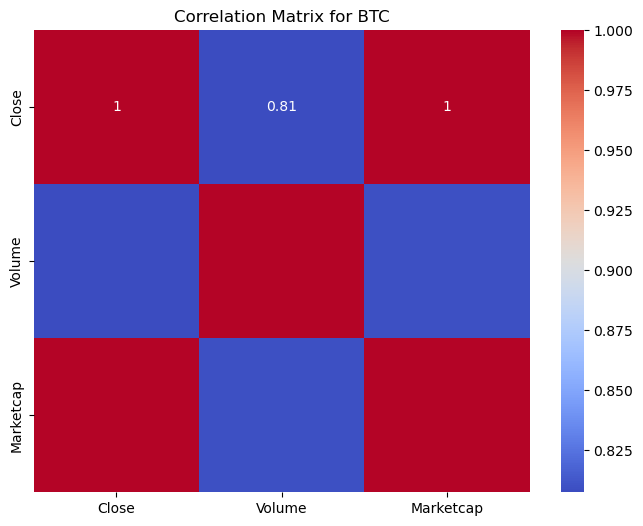

In [ ]:
# Filtered data for a specific cryptocurrency (e.g., Bitcoin)
BTC_df = filtered_df[filtered_df['Symbol'] == 'BTC']

# Calculate correlation matrix
correlation_matrix = BTC_df[['Close', 'Volume', 'Marketcap']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for BTC')
plt.show()

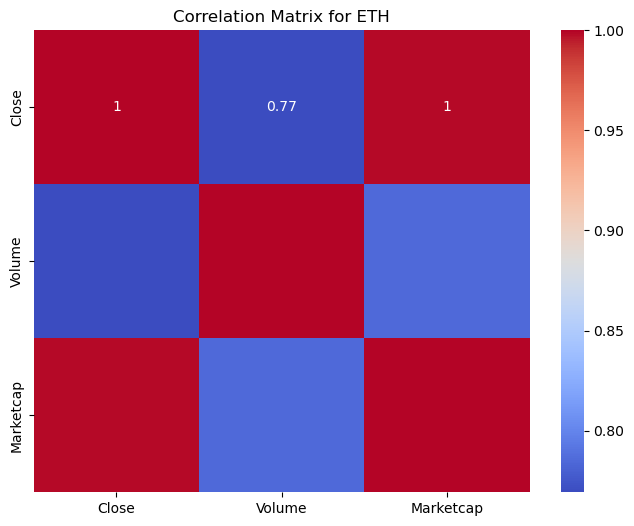

In [ ]:
# Filtered data for a specific cryptocurrency (e.g., Etheruem)
ETH_df = filtered_df[filtered_df['Symbol'] == 'ETH']

# Calculate correlation matrix
correlation_matrix = ETH_df[['Close', 'Volume', 'Marketcap']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for ETH')
plt.show()

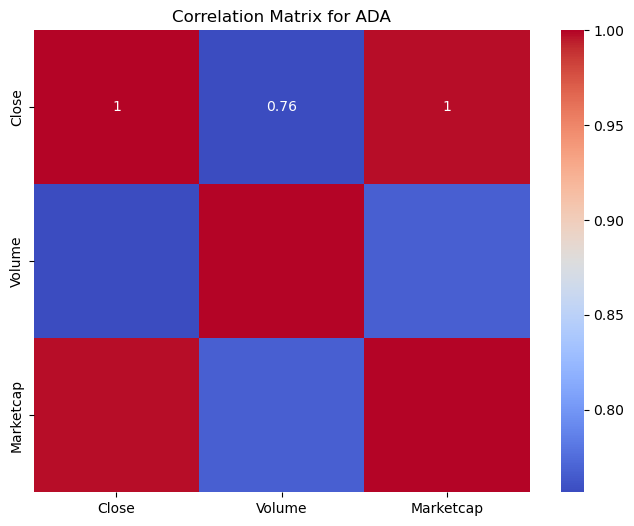

In [ ]:
# Filtered data for a specific cryptocurrency (e.g. Cardano)
ADA_df = filtered_df[filtered_df['Symbol'] == 'ADA']

# Calculate correlation matrix
correlation_matrix = ADA_df[['Close', 'Volume', 'Marketcap']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for ADA')
plt.show()

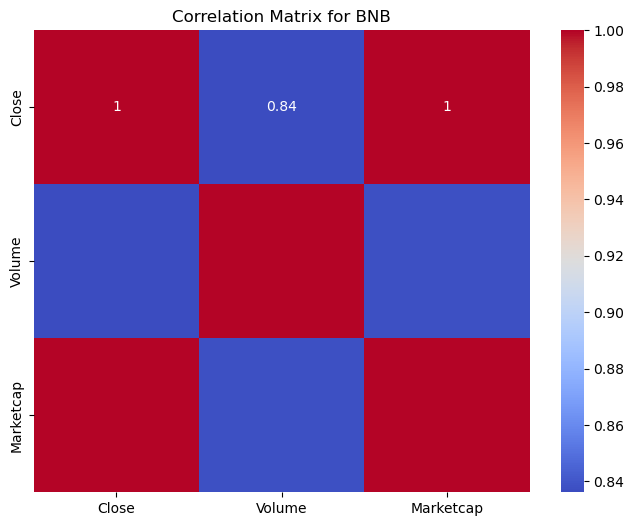

In [ ]:
# Filtered data for a specific cryptocurrency (e.g. Binance)
BNB_df = filtered_df[filtered_df['Symbol'] == 'BNB']

# Calculate correlation matrix
correlation_matrix = BNB_df[['Close', 'Volume', 'Marketcap']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for BNB')
plt.show()

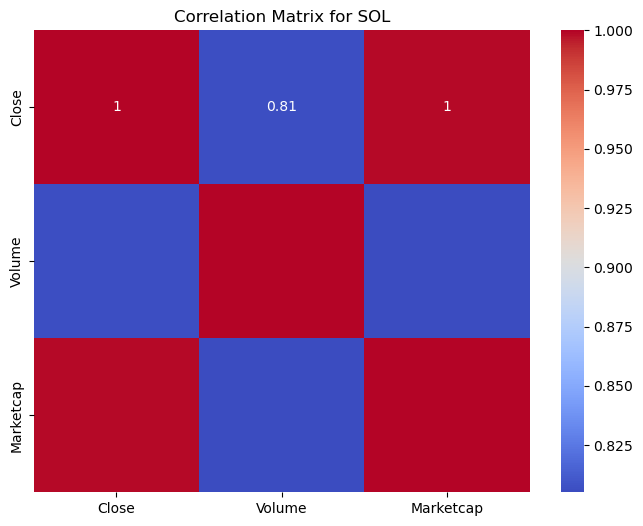

In [ ]:
# Filtered data for a specific cryptocurrency (e.g. Solana)
SOL_df = filtered_df[filtered_df['Symbol'] == 'SOL']

# Calculate correlation matrix
correlation_matrix = SOL_df[['Close', 'Volume', 'Marketcap']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for SOL')
plt.show()

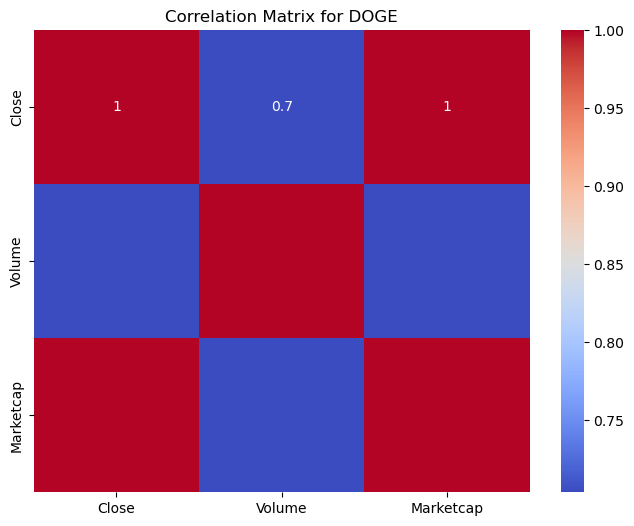

In [ ]:
# Filtered data for a specific cryptocurrency (e.g. DogeCoin)
DOGE_df = filtered_df[filtered_df['Symbol'] == 'DOGE']

# Calculate correlation matrix
correlation_matrix = DOGE_df[['Close', 'Volume', 'Marketcap']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for DOGE')
plt.show()

['BNB' 'BTC' 'ADA' 'DOGE' 'ETH' 'SOL']


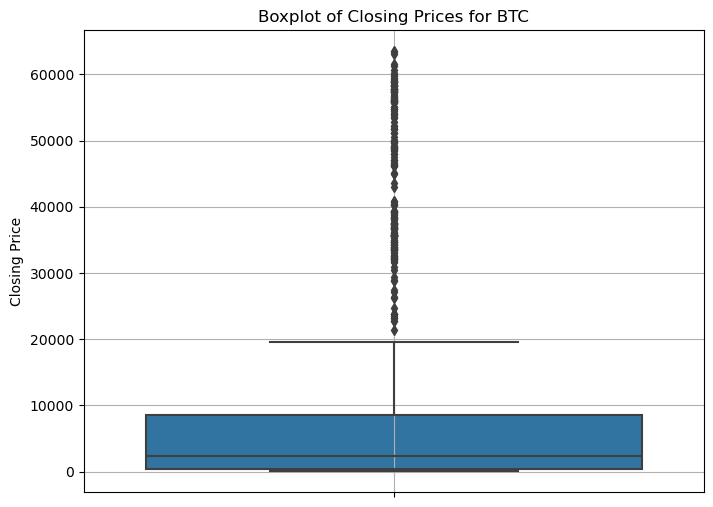

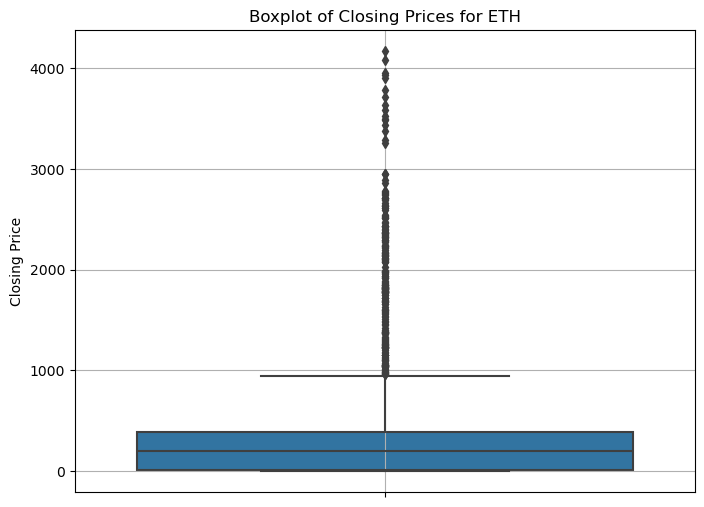

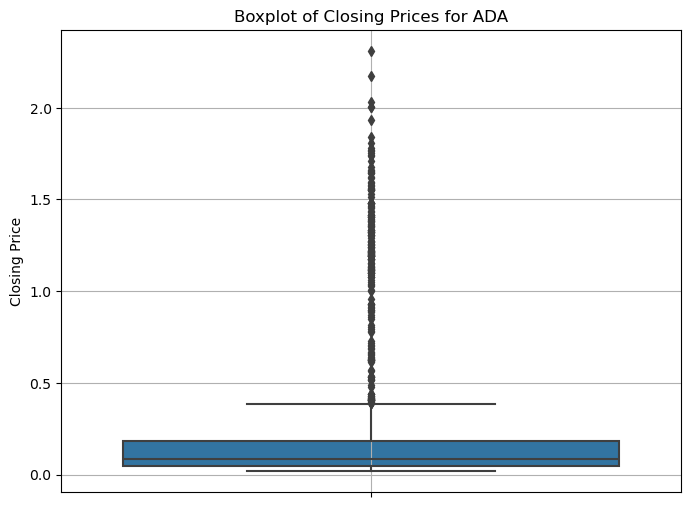

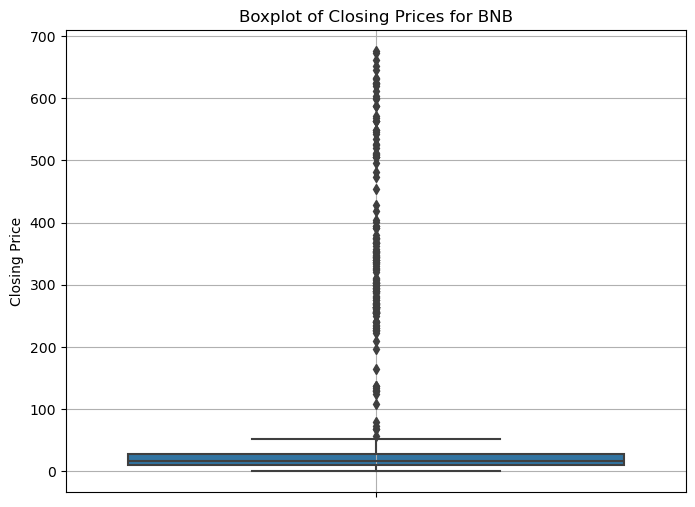

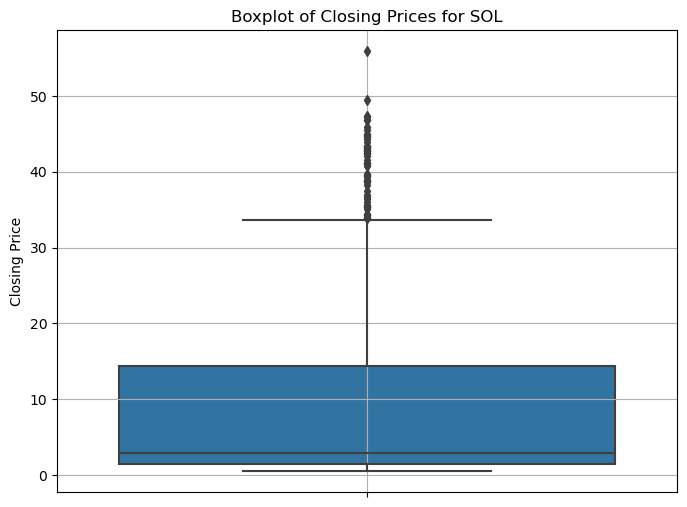

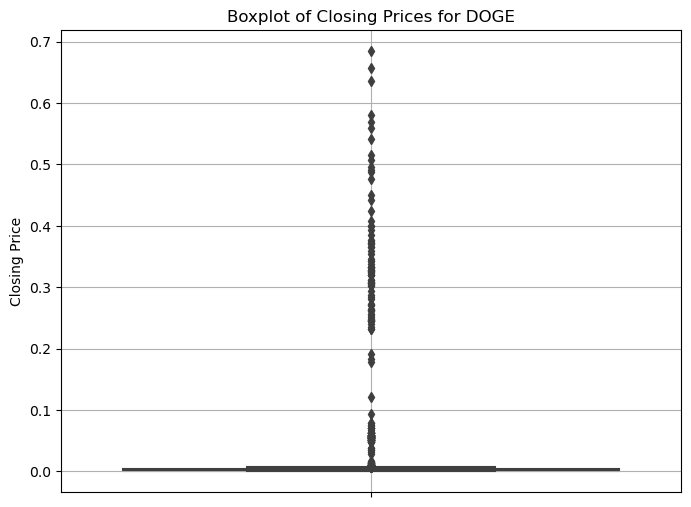

In [ ]:
# Load the correct dataset
crypto_data = pd.read_csv("../Project_1/Resources_Output/Crypto_merged.csv")
# Convert 'Date' column to datetime (if not already done)
crypto_data['Date'] = pd.to_datetime(crypto_data['Date'])
# Normalize symbol names to ensure consistency
crypto_data['Symbol'] = crypto_data['Symbol'].str.strip().str.upper()
# Define the target symbols
target_symbols = ['BTC', 'ETH', 'ADA', 'BNB', 'SOL', 'DOGE']
# Filter the DataFrame to include only the target symbols
filtered_df = crypto_data[crypto_data['Symbol'].isin(target_symbols)]
# Verify the unique symbols in the filtered DataFrame
print(filtered_df['Symbol'].unique())
# Loop through each cryptocurrency and create a boxplot
for symbol in target_symbols:
    # Filter data for the specific cryptocurrency
    symbol_df = filtered_df[filtered_df['Symbol'] == symbol]
    # Check if the symbol_df is not empty
    if not symbol_df.empty:
        plt.figure(figsize=(8, 6))
        sns.boxplot(y='Close', data=symbol_df)
        plt.title(f'Boxplot of Closing Prices for {symbol}')
        plt.ylabel('Closing Price')
        plt.grid(True)
        plt.show()
    else:
        print(f"No data available for {symbol}")

Correlation between daily sentiment and closing price: nan


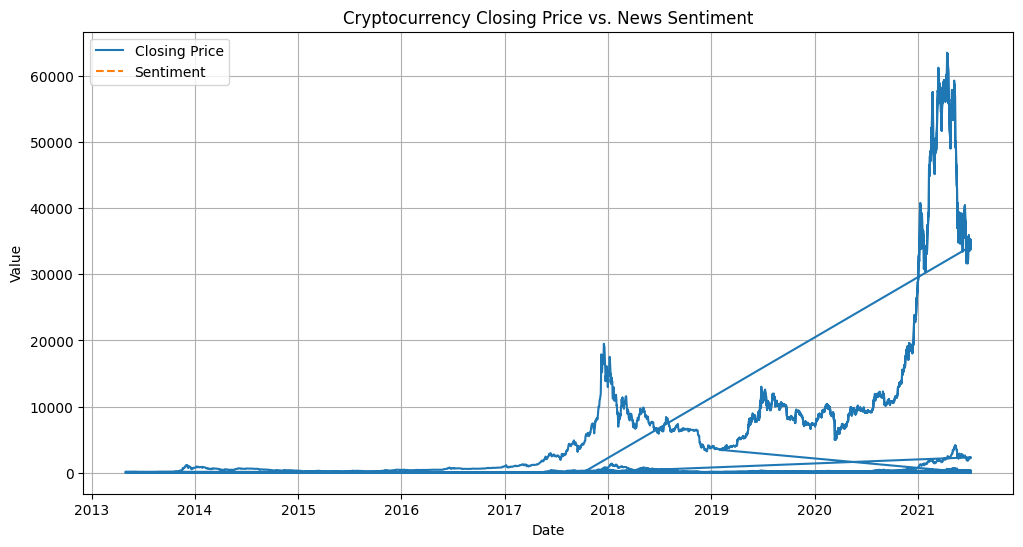

In [33]:
# Bonus # External event API

import requests
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Step 1: Set up your API key and NewsAPI endpoint
api_key = '66ffd34668864359ad468c8cf20f68dc'
query = 'Bitcoin OR Ethereum OR ADA OR Binance Coin OR Solana OR Dogecoin'
url = f'https://newsapi.org/v2/everything?q={query}&apiKey={api_key}&language=en'

# Step 2: Fetch the news articles
response = requests.get(url)
articles = response.json().get('articles', [])

# Step 3: Extract headlines and publication dates
headlines = [article['title'] for article in articles]
publication_dates = [article['publishedAt'][:10] for article in articles]  # Extracting just the date

# Step 4: Perform sentiment analysis on the headlines
analyzer = SentimentIntensityAnalyzer()
sentiments = [analyzer.polarity_scores(headline)['compound'] for headline in headlines]

# Step 5: Create a DataFrame to store headlines, dates, and sentiments
news_df = pd.DataFrame({
    'Date': publication_dates,
    'Headline': headlines,
    'Sentiment': sentiments
})

# Convert 'Date' to datetime
news_df['Date'] = pd.to_datetime(news_df['Date'])

# Step 6: Aggregate sentiment scores by date (e.g., mean sentiment per day)
daily_sentiment = news_df.groupby('Date')['Sentiment'].mean().reset_index()

# Step 7: Merge with your cryptocurrency price data
# Assuming you have a DataFrame `crypto_df` with Date and Close columns
crypto_df = pd.read_csv('../Project_1/Resources_Output/Crypto_merged.csv')  # Replace with your actual crypto data file
crypto_df['Date'] = pd.to_datetime(crypto_df['Date'])

# Merge on the 'Date' column
merged_df = pd.merge(crypto_df, daily_sentiment, on='Date', how='left')

# Step 8: Analyze the correlation between sentiment and closing price
correlation = merged_df['Close'].corr(merged_df['Sentiment'])
print(f"Correlation between daily sentiment and closing price: {correlation:.4f}")

# Step 9: Visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date'], merged_df['Close'], label='Closing Price')
plt.plot(merged_df['Date'], merged_df['Sentiment'], label='Sentiment', linestyle='--')
plt.title('Cryptocurrency Closing Price vs. News Sentiment')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


#Interpretation:
#This plot attempts to correlate the sentiment derived from news articles with the actual closing prices of a cryptocurrency. 
#The goal is to see if there is any meaningful relationship between public sentiment (as captured by news articles)
#  and the market performance of the cryptocurrency. However, the lack of correlation (as indicated by NaN) suggests that 
# either the data did not align properly, or there may be no significant relationship captured in this analysis.
#This graph could be a starting point for further analysis, including investigating 
# the reason for the NaN correlation, ensuring proper alignment of the data, and 
# exploring alternative ways to measure and visualize the relationship between sentiment and price.








In [35]:
#Lagged Sentiment Analysis based on API

#Description: Investigate whether sentiment from previous days impacts future cryptocurrency prices. 
# This can help identify delayed reactions in the market.


for lag in range(1, 8):  # Check lags from 1 to 7 days
    merged_df[f'Sentiment_Lag_{lag}'] = merged_df['Sentiment'].shift(lag)
    correlation = merged_df[f'Sentiment_Lag_{lag}'].corr(merged_df['Close'])
    print(f"Lag {lag} days - Correlation: {correlation:.4f}")



#The lagged sentiment analysis aimed to investigate if past sentiment impacts future cryptocurrency 
# prices over 1 to 7 days, but all correlations returned as NaN, indicating no measurable relationship. 
# Similarly, the volatility analysis examined the correlation between sentiment and volatility, 
# which also resulted in a NaN correlation,
#  suggesting no significant connection between these variables in the provided dataset.

Lag 1 days - Correlation: nan
Lag 2 days - Correlation: nan
Lag 3 days - Correlation: nan
Lag 4 days - Correlation: nan
Lag 5 days - Correlation: nan
Lag 6 days - Correlation: nan
Lag 7 days - Correlation: nan


In [36]:
#Volatility Analysis based on API
merged_df['Returns'] = merged_df['Close'].pct_change()
merged_df['Volatility'] = merged_df['Returns'].rolling(window=7).std()

# Correlation between volatility and sentiment
volatility_sentiment_corr = merged_df['Volatility'].corr(merged_df['Sentiment'])
print(f"Correlation between volatility and sentiment: {volatility_sentiment_corr:.4f}")

Correlation between volatility and sentiment: nan


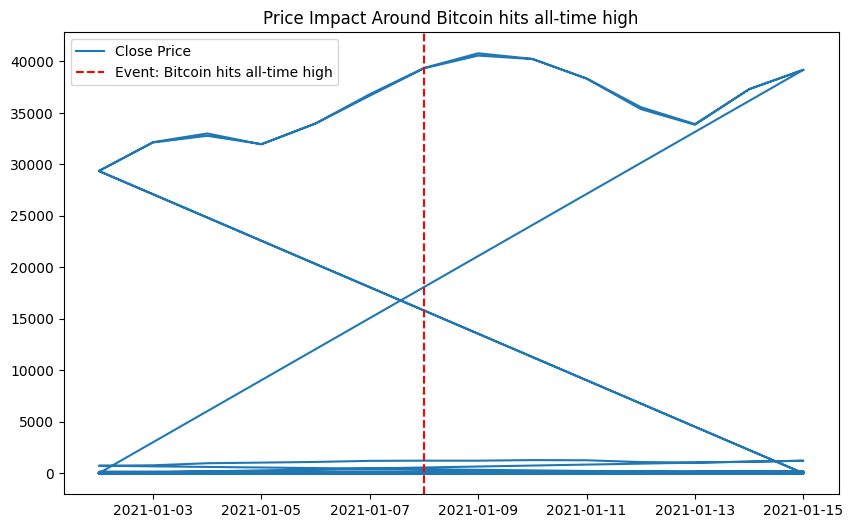

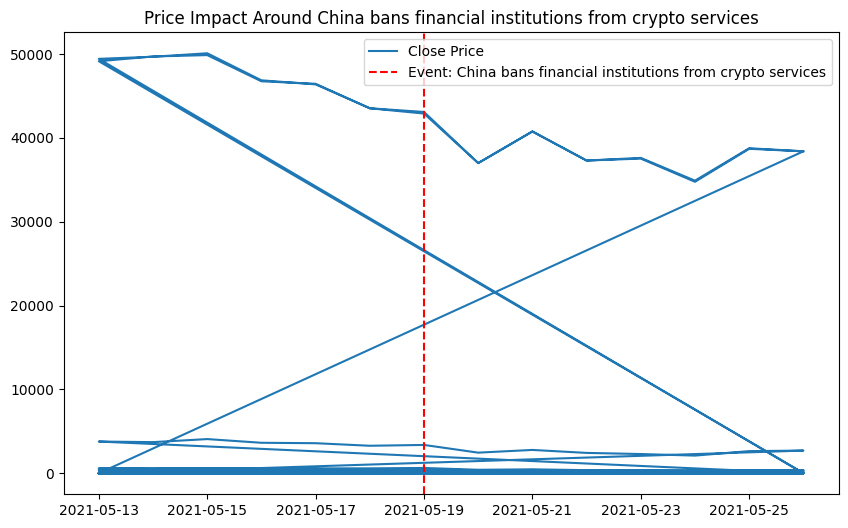

In [37]:
#Event-Driven Analysis based on API
# Assume you manually annotate events

#Description: Identify key events (e.g., regulatory changes, major partnerships, technological updates) 
# and analyze their impact on cryptocurrency prices.

events = {
    '2021-01-08': 'Bitcoin hits all-time high',
    '2021-05-19': 'China bans financial institutions from crypto services'
}

for event_date, event_name in events.items():
    event_date = pd.to_datetime(event_date)
    window = merged_df[(merged_df['Date'] >= event_date - pd.Timedelta(days=7)) &
                       (merged_df['Date'] <= event_date + pd.Timedelta(days=7))]
    
    plt.figure(figsize=(10, 6))
    plt.plot(window['Date'], window['Close'], label='Close Price')
    plt.axvline(x=event_date, color='red', linestyle='--', label=f'Event: {event_name}')
    plt.title(f'Price Impact Around {event_name}')
    plt.legend()
    plt.show()



#Event-Driven Price Impact Analysis
# The analysis focused on the impact of significant events on the prices of cryptocurrencies. 

# Specifically, two key events were examined:

#Bitcoin Hits All-Time High (January 8, 2021): The plot shows the price movement around this event. 
# As expected, there was a positive price trend leading up to the all-time high, 
# but the price showed signs of volatility following the event.

#China Bans Financial Institutions from Crypto Services (May 19, 2021): 
# This event shows a clear downward impact on cryptocurrency prices. 
# The significant drop following the event highlights the negative market sentiment 
# and potential panic selling triggered by the news.

#These analyses indicate that certain events can have substantial effects on cryptocurrency prices, 
# while others may not show a clear connection to sentiment and volatility. 
# The results reinforce the importance of monitoring key events and news in the cryptocurrency market, 
# as they can be pivotal in predicting price movements.

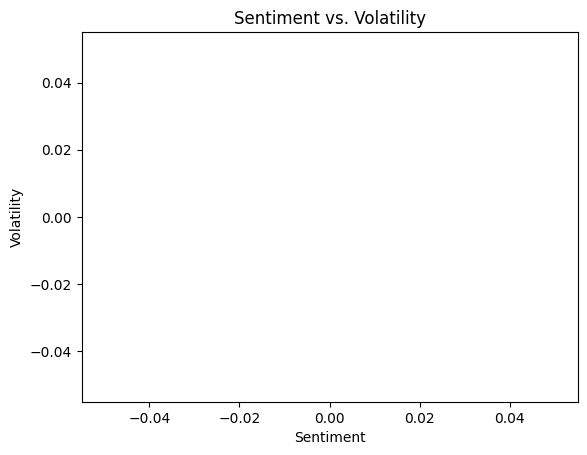

Correlation between sentiment and volatility: nan


In [38]:
# Sentiment-Volatility Relationship based on API 

#Description: Analyze how shifts in sentiment might relate to changes in volatility. 
# This could reveal whether extreme sentiment (positive or negative) leads to higher market volatility.


plt.scatter(merged_df['Sentiment'], merged_df['Volatility'])
plt.xlabel('Sentiment')
plt.ylabel('Volatility')
plt.title('Sentiment vs. Volatility')
plt.show()

# Correlation
sentiment_volatility_corr = merged_df['Sentiment'].corr(merged_df['Volatility'])
print(f"Correlation between sentiment and volatility: {sentiment_volatility_corr:.4f}")



#Scatter Plot Analysis: The scatter plot of sentiment versus volatility appears to be almost empty,
#  indicating that there might not be a significant relationship between the two variables in the dataset you analyzed.
#  This could suggest that sentiment, as measured by the sentiment scores from news articles,
#  does not have a straightforward or strong relationship with the volatility of cryptocurrency prices.

#The analysis suggests that in this particular dataset, 
# sentiment derived from news sources does not show a clear 
# or consistent correlation with the volatility 
# of cryptocurrency prices. This lack of correlation might indicate 
# that other factors are more influential in driving volatility, 
# or that the sentiment data needs further refinement or a different approach to capture its potential impact on volatility.

In [42]:
# Portfolio Optimization based on API 

#Description: Construct and optimize a cryptocurrency portfolio using 
# Markowitz's Modern Portfolio Theory (MPT), focusing on risk-adjusted returns.

# Filter the DataFrame to include only the relevant symbols
symbols = ['BTC', 'ETH', 'ADA', 'BNB', 'SOL', 'DOGE']
filtered_df = merged_df[merged_df['Symbol'].isin(symbols)]

# Pivot the DataFrame if necessary
pivot_df = filtered_df.pivot(index='Date', columns='Symbol', values='Close')

# Check the structure
print(pivot_df.head())

# Calculate daily returns
returns_df = pivot_df.pct_change().dropna()

# Print the first few rows to verify
print(returns_df.head())

import numpy as np

# Number of assets
num_assets = len(symbols)

# Randomly generate portfolio weights
weights = np.random.random(num_assets)
weights /= np.sum(weights)  # Normalize weights

# Calculate expected portfolio return
expected_return = np.sum(weights * returns_df.mean()) * 252  # Annualized return

# Calculate portfolio volatility
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns_df.cov() * 252, weights)))

# Calculate Sharpe ratio (assuming risk-free rate of 0)
sharpe_ratio = expected_return / portfolio_volatility

print(f"Expected Portfolio Return: {expected_return:.4f}")
print(f"Portfolio Volatility: {portfolio_volatility:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")


#Based on the portfolio optimization results:

#Expected Portfolio Return: The portfolio is expected to yield an annual return of approximately 2.6146%. 
# This indicates that, on average, the portfolio is expected to grow by this percentage over a year, 
# assuming historical returns remain consistent.

#Portfolio Volatility: The annualized volatility of the portfolio is 0.9298. 
# This figure represents the standard deviation of the portfolio's returns, 
# indicating the level of risk associated with the portfolio. Higher volatility suggests higher risk, 
# with greater potential for fluctuations in value.

#Sharpe Ratio: The Sharpe Ratio for this portfolio is 2.8121. 
# This ratio is a measure of risk-adjusted return, indicating how much return 
# you are receiving for each unit of risk taken. A Sharpe ratio above 1 is generally considered good, 
# and a ratio above 2 is considered excellent. Thus, a Sharpe ratio of 2.8121 suggests 
# that the portfolio is well-optimized, providing a strong return relative to the amount of risk.

#These results indicate that the portfolio is well-diversified and balanced, 
# providing a solid return for the risk undertaken. The relatively high Sharpe Ratio is particularly positive, 
# suggesting that the portfolio is efficiently using risk to generate returns.








Symbol               ADA  BNB         BTC  DOGE  ETH  SOL
Date                                                     
2013-04-29 23:59:59  NaN  NaN  144.539993   NaN  NaN  NaN
2013-04-30 23:59:59  NaN  NaN  139.000000   NaN  NaN  NaN
2013-05-01 23:59:59  NaN  NaN  116.989998   NaN  NaN  NaN
2013-05-02 23:59:59  NaN  NaN  105.209999   NaN  NaN  NaN
2013-05-03 23:59:59  NaN  NaN   97.750000   NaN  NaN  NaN
Symbol                    ADA       BNB       BTC      DOGE       ETH  \
Date                                                                    
2020-04-12 23:59:59  0.013544  0.041351  0.016330  0.000207  0.018496   
2020-04-13 23:59:59 -0.020682  0.045865 -0.018082 -0.015688 -0.030177   
2020-04-14 23:59:59 -0.004008  0.032635 -0.000381  0.002854  0.008426   
2020-04-15 23:59:59 -0.033683 -0.059977 -0.029276 -0.012205 -0.027345   
2020-04-16 23:59:59  0.079876  0.075977  0.071467  0.044925  0.123106   

Symbol                    SOL  
Date                           
2020-04-12 23:59:5

In [16]:
#Independent Samples t-test for all pairs of the given cryptocurrencies: 'BTC', 'ETH', 'ADA', 'BNB', 'SOL', 'DOGE'.

# You can use an independent samples t-test to compare the means of two independent groups 
# (e.g., the closing prices of two different cryptocurrencies) 
# to see if there is a statistically significant difference between them.


from scipy.stats import ttest_ind
import itertools

# Define the symbols for which we want to perform the t-test
symbols = ['BTC', 'ETH', 'ADA', 'BNB', 'SOL', 'DOGE']

# Iterate over all pairs of symbols
for symbol1, symbol2 in itertools.combinations(symbols, 2):
    # Get closing prices for the two cryptocurrencies
    close1 = filtered_df[filtered_df['Symbol'] == symbol1]['Close']
    close2 = filtered_df[filtered_df['Symbol'] == symbol2]['Close']
    
    # Perform the independent samples t-test
    t_stat, p_value = ttest_ind(close1, close2, equal_var=False)
    
    print(f"T-test between {symbol1} and {symbol2}:")
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")
    
    # Interpretation
    if p_value < 0.05:
        print(f"There is a significant difference between the closing prices of {symbol1} and {symbol2}.\n")
    else:
        print(f"There is no significant difference between the closing prices of {symbol1} and {symbol2}.\n")


#The independent samples t-tests conducted between different cryptocurrency pairs (BTC, ETH, ADA, BNB, SOL, DOGE)
#  all show statistically significant differences in their closing prices.
#  This indicates that each of these cryptocurrencies exhibits distinct price behavior over the period analyzed, 
# confirming that they do not share the same price distribution and likely behave differently in the market.

T-test between BTC and ETH:
T-statistic: 30.568608773691224
P-value: 5.427932998292799e-179
There is a significant difference between the closing prices of BTC and ETH.

T-test between BTC and ADA:
T-statistic: 32.48558018708678
P-value: 1.5504150386277179e-198
There is a significant difference between the closing prices of BTC and ADA.

T-test between BTC and BNB:
T-statistic: 32.23041042777768
P-value: 6.878024439775112e-196
There is a significant difference between the closing prices of BTC and BNB.

T-test between BTC and SOL:
T-statistic: 32.43596542298349
P-value: 5.0999887756100835e-198
There is a significant difference between the closing prices of BTC and SOL.

T-test between BTC and DOGE:
T-statistic: 32.48675432597838
P-value: 1.5072757926763687e-198
There is a significant difference between the closing prices of BTC and DOGE.

T-test between ETH and ADA:
T-statistic: 29.664394618350745
P-value: 1.6786324296681026e-162
There is a significant difference between the closing pr

In [18]:
#correlation analysis for all pairs of the given cryptocurrencies: 'BTC', 'ETH', 'ADA', 'BNB', 'SOL', 'DOGE'

#performing a Pearson correlation analysis between the returns of two 
# cryptocurrencies to see how closely their returns move together.
import itertools

# Define the symbols for which we want to perform the correlation analysis
symbols = ['BTC', 'ETH', 'ADA', 'BNB', 'SOL', 'DOGE']

# Create an empty dictionary to store the correlation results
correlation_results = {}

# Iterate over all pairs of symbols
for symbol1, symbol2 in itertools.combinations(symbols, 2):
    # Get closing prices for the two cryptocurrencies
    close1 = filtered_df[filtered_df['Symbol'] == symbol1]['Close']
    close2 = filtered_df[filtered_df['Symbol'] == symbol2]['Close']
    
    # Calculate the Pearson correlation coefficient
    correlation = close1.corr(close2)
    
    # Store the result in the dictionary
    correlation_results[(symbol1, symbol2)] = correlation
    
    print(f"Correlation between {symbol1} and {symbol2}: {correlation:.4f}")
    
    # Interpretation
    if abs(correlation) > 0.7:
        print(f"Strong correlation between the closing prices of {symbol1} and {symbol2}.\n")
    elif abs(correlation) > 0.5:
        print(f"Moderate correlation between the closing prices of {symbol1} and {symbol2}.\n")
    else:
        print(f"Weak or no correlation between the closing prices of {symbol1} and {symbol2}.\n")

Correlation between BTC and ETH: nan
Weak or no correlation between the closing prices of BTC and ETH.

Correlation between BTC and ADA: nan
Weak or no correlation between the closing prices of BTC and ADA.

Correlation between BTC and BNB: nan
Weak or no correlation between the closing prices of BTC and BNB.

Correlation between BTC and SOL: nan
Weak or no correlation between the closing prices of BTC and SOL.

Correlation between BTC and DOGE: nan
Weak or no correlation between the closing prices of BTC and DOGE.

Correlation between ETH and ADA: nan
Weak or no correlation between the closing prices of ETH and ADA.

Correlation between ETH and BNB: nan
Weak or no correlation between the closing prices of ETH and BNB.

Correlation between ETH and SOL: nan
Weak or no correlation between the closing prices of ETH and SOL.

Correlation between ETH and DOGE: nan
Weak or no correlation between the closing prices of ETH and DOGE.

Correlation between ADA and BNB: nan
Weak or no correlation 

In [19]:

#ANOVA (Analysis of Variance) to compare the means of the closing prices across all 
# the given cryptocurrencies: 'BTC', 'ETH', 'ADA', 'BNB', 'SOL', 'DOGE'.

#to compare the means of more than two groups
#  we are using ANOVA 
# For instance, you can compare the mean closing prices of multiple cryptocurrencies.


from scipy.stats import f_oneway

# Define the symbols for which we want to perform ANOVA
symbols = ['BTC', 'ETH', 'ADA', 'BNB', 'SOL', 'DOGE']

# Create a list to hold the closing price data for each cryptocurrency
closing_prices = []

# Collect the closing prices for each cryptocurrency
for symbol in symbols:
    close_prices = filtered_df[filtered_df['Symbol'] == symbol]['Close']
    closing_prices.append(close_prices)
    
# Perform one-way ANOVA
f_stat, p_value = f_oneway(*closing_prices)

print("ANOVA Results:")
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in the mean closing prices between the cryptocurrencies.\n")
else:
    print("There is no significant difference in the mean closing prices between the cryptocurrencies.\n")

ANOVA Results:
F-statistic: 558.8760773539079
P-value: 0.0
There is a significant difference in the mean closing prices between the cryptocurrencies.



In [22]:
#Chi-Square Test of Independence

# to explore the relationship between two categorical variables
#  (e.g., price increase vs. price decrease across different days of the week), 
# we are using the Chi-Square Test of Independence.

from scipy.stats import chi2_contingency

# Create a contingency table
# Example: Price increase or decrease vs. day of the week
filtered_df['Price_Change'] = filtered_df['Close'].diff().fillna(0)
filtered_df['Price_Direction'] = filtered_df['Price_Change'].apply(lambda x: 'Increase' if x > 0 else 'Decrease')

contingency_table = pd.crosstab(filtered_df['Price_Direction'], filtered_df['Date'].dt.day_name())

# Perform Chi-Square Test of Independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

# Interpretation
if p < 0.05:
    print("There is a significant relationship between price direction and day of the week.\n")
else:
    print("There is no significant relationship between price direction and day of the week.\n")

Chi-Square Test Results:
Chi-Square Statistic: 23.957583636661617
P-value: 0.0005317235834825665
There is a significant relationship between price direction and day of the week.



/var/folders/w1/qdc81k1s4v71sl9kx33yj1d40000gn/T/ipykernel_97685/315617371.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Price_Change'] = filtered_df['Close'].diff().fillna(0)
/var/folders/w1/qdc81k1s4v71sl9kx33yj1d40000gn/T/ipykernel_97685/315617371.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Price_Direction'] = filtered_df['Price_Change'].apply(lambda x: 'Increase' if x > 0 else 'Decrease')
